# TRAINING DEEP NEURAL NETWORKS

In [1]:
#If you want to import the dependencies quietly
!pip install import_ipynb --quiet

In [2]:
!pip install pandas==1.3.4

In [692]:
import requests

In [ ]:
#If on colab and if you do not have course_data.ipynb
#  and utils.ipynb already
r=requests.get("https://github.com/gmshroff/metaLearning2022/blob/main/code/utils.ipynb?raw=true")
with open('./utils.ipynb','wb') as f: f.write(r.content)
r=requests.get("https://github.com/gmshroff/metaLearning2022/blob/main/code/course_data.ipynb?raw=true")
with open('./course_data.ipynb','wb') as f: f.write(r.content)


In [3]:
#if the code files are on gdrive else ignore
from google.colab import drive
drive.mount('/content/drive')
%ls drive/MyDrive/'Colab Notebooks'

In [ ]:
#if models.ipynb is in the gdrive
!cp drive/MyDrive/'Colab Notebooks'/Meta_Learning_hw1/models.ipynb .

In [ ]:
import import_ipynb
import utils
#HW 1 - write code for models in models.ipynb
import models
from IPython import display
import torch
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import pickle
import importlib


In [ ]:
#If on colab

from course_data import MyDS, ImageData, TsDS, FeedData

Random data in $\mathcal{R}^N$ in $C$ clusters/classes.

In [ ]:
#Generate data - euclidean
train_ds, test_ds, dloader = utils.euclideanDataset(n_samples=10000,n_features=20,n_classes=10,batch_size=32)

Using random data in $\mathcal{R}^4$ as above to generate sin wave mixures; each class has different mean frequencies and amplitues.

Project data down to a 2-D space for visualiation.

In [ ]:
torch.Tensor.size(test_ds.samples)
# train_ds.samples[0]

torch.Size([2500, 20])

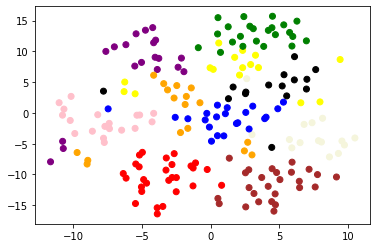

In [ ]:
tsne = TSNE()
X_2d = tsne.fit_transform(train_ds.samples[0:200])
colors=["red","green","blue","yellow","pink","black","orange","purple","beige","brown"]
labcol=lambda i: colours[i]
plt.scatter(X_2d[:,0],X_2d[:,1],c=[colors[l] for l in train_ds.labels[0:200]])
plt.show()

Time series data

In [ ]:
#Generate data - sinusoidal mix
train_ds, test_ds, dloader = utils.sinDataset(n_samples=100,length=20,n_classes=5,batch_size=1)

In [ ]:
torch.Tensor.size(train_ds.samples) # 20-Dimensional, 25 train samples, 75 test samples
# train_ds.samples[1]
# train_ds.labels

torch.Size([75, 20])

Financial Time Series

In [ ]:
r=requests.get("https://github.com/gmshroff/metaLearning2022/blob/main/data/feedDataTrain.pickle.zip?raw=true")
with open('./feedsDataTrain.pickle.zip','wb') as f: f.write(r.content)
!unzip feedsDataTrain.pickle.zip

Archive:  feedsDataTrain.pickle.zip
  inflating: feedDataTrain.pickle    


In [ ]:
with open('./feedDataTrain.pickle','rb') as f: feedDataMetaTrain=pickle.load(f)

/Users/sweta/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
r=requests.get("https://github.com/gmshroff/metaLearning2022/blob/main/data/feedDataTest.pickle.zip?raw=true")
with open('./feedsDataTest.pickle.zip','wb') as f: f.write(r.content)
!unzip feedsDataTest.pickle.zip

Archive:  feedsDataTest.pickle.zip
  inflating: feedDataTest.pickle     


In [ ]:
with open('./feedDataTest.pickle','rb') as f: feedDataMetaTest=pickle.load(f)

/Users/sweta/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Image data from NAR project

In [ ]:
#If on Colab/student machine use the next few lines to load image data:
r=requests.get("https://github.com/gmshroff/metaLearning2022/blob/main/data/image_data.pickle.zip?raw=true")
with open('./image_data.pickle.zip','wb') as f: f.write(r.content)
!unzip ./image_data.pickle.zip


In [ ]:
with open('./image_data.pickle','rb') as f: imageData=pickle.load(f)

In [ ]:

train_ds,test_ds,mapping,dloader=imageData.train_ds,imageData.test_ds,imageData.mapping,imageData.dloader

In [ ]:
a=14
# plt.imshow(train_ds[a][0].reshape(20,20))
print(torch.Tensor.size(train_ds[a][0]))
# print(train_ds.samples[0])
# plt.imshow([t for t in train_ds][11][0].reshape(20,20)) #original
# torch.Tensor.size(train_ds.samples)
# mapping[int(train_ds.labels[a])] #'mapping' maps the class label to the class name
#len(mapping.keys())
# mapping.values()

torch.Size([400])


The well-known MNIST data of handwritten characters.

In [ ]:
train_ds, test_ds, dloader = utils.mnist_data(frac=0.25,download=True)

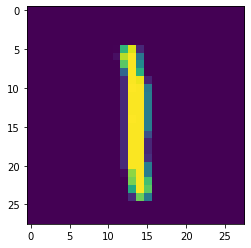

In [ ]:
a=14
plt.imshow(train_ds[a][0].reshape(28,28))
# print(torch.Tensor.size(train_ds[a][0]))
# print(train_ds.samples[0])
# plt.imshow([t for t in train_ds][11][0].reshape(20,20)) #original
# torch.Tensor.size(train_ds.samples)
# mapping[int(train_ds.labels[a])]

In [ ]:
plt.imshow(train_ds.samples.reshape(15000,28,28)[10])
plt.show()

In [ ]:
train_ds.samples[0].shape

In [ ]:
net(train_ds.samples[10].unsqueeze(0))

Simple MLP

In [ ]:
torch.Tensor.size(train_ds.samples)

torch.Size([7500, 20])

In [ ]:
importlib.reload(models)
# Define an MLP network. Note that input dimension has to be data dimension. For classification
# final dimension has to be number of classes; for regression one.
#torch.manual_seed(10)
# net = models.MLP(dims=[20,128,64,10])  #Euclidean data
net = models.MLP(dims=[400,128,64,74]) #NAR image
# net = models.MLP(dims=[784,128,64,10]) #MNIST
# net = models.MLP(dims=[20,128,64,5])   #SinDataSet 

Recurrent neural network.

There are 5 datasets:
1) Euclidean
2)SinDataSet(Time Series)
3)FeedDataMeta(Time Series)
4)NAR(Image)
5)MNIST(Image)

 (Architecture+Datset)          Train Accuracy  |  Test Accuracy |  Epochs | Training Time |
|MLP (Euclidean)            |     99.08         |     97.08      |    10   |    11s        | 
| MLP(SinDataSet)           |     96            |     44         |    10   |    2.2s       |     
|   MLP (NAR)               |     99.08         |     97.08      |    10   |    23.5s      |
|   MLP (MNIST)             |     99.4          |     96.13      |    10   |    26.1       | 

|RNN (SinDataSet)           |    99.23          |    98.34       |    10   |    10.1s      |  
|RNN (FeedDataMeta)         |    98             |    88          |     5   |    11.1s      | 

|LSTM (SinDataSet)          |    48             |    32          |    10   |    2.7s       | 
|LSTM (FeedDataMeta)        |    98.11          |    88.78       |    5    |    6.3s       |  

|Conv 1D (SinDataSet)       |    89.33          |   72           |    10   |    3.3s       | 
|Conv 1D (FeedDataMeta)     |    97.79          |   89.38        |    5    |    5.2s       | 

|Trnasformer (SinDataSet)   |   36              |   36           |    10   |    24s        | 
|Trnasformer(FeedDataMeta)  |   35              |   31           |    10   |    20s        | 
 
|Conv 2D (NAR)              |   99.06           |   97.75        |   10    |    57s        | 
|Conv 2D (MNIST)            |   98.78           |   97.75        |   10    |    1m 7s      | 


Covolutional Neural network (For Images):
1) Since the input image size is 28*28(MNIST) and 20*20 (NAR), having two convolutional layers is the most appropriate. 
2) 3-concolutional layes reduces the accuracy of the model.
3) Increasing the number of channels in the convolutional layers increases the information stored about the image, hence the accuracy of the model increases. Although time to train the model increases. 
4) Using stride is not useful here a sthe image is of low resolution.
5) Using 3 conv layes followed by relu and max pool with 128 channels gives the best accuracy of train acc=99.7, test acc=97.98 but it takes much more time for training. And also it is a slight improvement over the 2-conv and 64 channels which takes considerably less time. So, I am using the latter for the assignment.  

For MNIST:
           lr        train acc       test acc     time        remarks
1-conv   1e-3        95.28           94.1         35.1       
1-conv   1e-2        98.38           95.45        35.2s
2-conv   1e-3        97.58           96.93        49.7s        lr=1e-3, acc is less but the loss comes out to be consistent. 
2-conv   1e-2        98.16           96.44        53.8s        using a higher lr overfits the data a bit.         
3-conv   1e-3        95.34           94.94        1m
3-conv   1e-2        94.44           93.92        57.2s 


Final Accuracy:
1)MNIST- train acc=99.11     test acc=97.83
2)NAR-   train acc=98.53     test acc=96.85




Obseevations:
MLP:
1) Increasing number of epochs increases time required fo rtraining but increases the accuracy.
2)MLP most suited for data which are neither image nor sequential i.e., which neither have spatial or temporal ordering. MLP is does not know how to levergae the structure of an image nor the sequential nature of data. When MLP is trained on the time series data, the train accuracy is high since it overfits the data but the test accuracy is low. Since the images are high dimensional, the raining time is much high. Since the image is of low resolution, there is not much of structure to be leveraged and the model is performing good. 

Transformer:
-Increasing number of heads increases accuracy. 


LSTM or RNN:
1) Increasing the hidden_size or increasing the num_layers increases the accuracy but also increases the time for training.






In [ ]:
#sin Data
importlib.reload(models)
# Define an RNN to process a sequence; default is 1-D where input can be (batch,seq_vals) else input will need to be given
# with an extra dimension and input will be (batch,seq,features)
net = models.SimpleRNN(input_size=1,hidden_size=32,output_size=5,lr=1e-3) #h [1,20,5] , x=[]

In [ ]:
#Financial time series
importlib.reload(models)
net = models.SimpleRNN(input_size=149,hidden_size=128,output_size=3,lr=1e-3) 

/Users/sweta/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
#Sin Data
net = models.SimpleLSTM(input_size=1,hidden_size=32,output_size=5,lr=1e-3)

In [ ]:
#Financial time series
net = models.SimpleLSTM(input_size=149,hidden_size=64,output_size=3,lr=1e-3)

In [ ]:
#Sin Data
importlib.reload(models)
net=models.CNN_1D(in_channels=1,num_classes=5, lr=1e-3, data="sin") #try 1e-3,acc is less but consistent loss comes 
#getting away with pooling layer decreases the gap between train acc and test acc

In [ ]:
#Financial time series
net=models.CNN_1D(in_channels=149,num_classes=3, lr=1e-3, data="fin")

In [ ]:
#Sin Data
importlib.reload(models)
net = models.Transformer(num_classes=5,lr=1e-3, data="sin") #h [1,20,5] , x=[]

In [ ]:
#Financial time series
net = models.Transformer(num_classes=3,lr=1e-3, data="fin") 

In [ ]:
#For MNIST 
net=models.CNN_2D(mod_size=[28,28], in_channels=1,num_classes=10, lr=1e-3) #train acc=97.58, test acc=96.93, 49.7s
#lr=1e-2 train acc=98.16, test acc=96.44, 53.8sec , overfits a bit

In [ ]:
#For NAR
net=models.CNN_2D(mod_size=[20,20], in_channels=1,num_classes=74, lr=1e-3)

Train the network

In [ ]:
# print(torch.__version__)
importlib.reload(models)
# Train the network; note that network is trained in place so repeated calls further train it.
net,losses,accs=models.Train(net,dloader,epochs=10,verbose=False)

In [ ]:

net,losses,accs=models.Train(net,feedDataMetaTrain.train_ds,epochs=5,verbose=False)

Accuracy on training set.

In [653]:
#Training accuracy.
models.accuracy(net,train_ds.samples,train_ds.labels,verbose=False)

0.36

In [610]:
models.accuracy_variable(net,feedDataMetaTrain.train_ds)

0.9779874213836478

Accuracy on test set.

In [654]:
# # Test accuracy.
models.accuracy(net,test_ds.samples,test_ds.labels)

9.0 25


0.36

In [611]:
models.accuracy_variable(net,feedDataMetaTrain.test_ds)

0.8930817610062893